## FEAS Exercise 1: Solving Poisson equation with collocation method

Consider the Poisson equation $-\Delta u(x, y) = f(x, y)$ on a square domain $\Omega = [0,1] \times [0,1]$ with $f(x,y) = 1$.
Use the point collocation method with $n=4$ basis functions
\begin{align*}
u_1(x,y) &= x(1-x)y(1-y), \\
u_2(x,y) &= x(1-x)y^2(1-y)^2, \\
u_3(x,y) &= x^2(1-x)^2y(1-y), \\
u_4(x,y) &= x^2(1-x)^2y^2(1-y)^2,
\end{align*}
and four collocation points at
\begin{align*}
P_1 = \left(\frac{1}{4}, \frac{1}{4}\right), \quad
P_2 = \left(\frac{1}{2}, \frac{1}{2}\right), \quad
P_3 = \left(\frac{1}{2}, \frac{3}{4}\right), \quad
P_4 = \left(0, \frac{1}{2}\right).
\end{align*}
Find the approximate solution $u_n = \sum_{i=1}^4 n_i u_i(x,y)$. Assume zero Dirichlet boundary conditions $u(x, y) = 0$ on the boundary $\Gamma = \partial \Omega$ of the domain.

What would happen if you place the collocation points uniformly?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We'll define the basis functions as python functions and the also Laplace operator applied to them. Recall that
$$\Delta u(x, y) := \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}.$$

In [99]:
def u1(x, y):
    return x*(1-x)*y*(1-y)

def ddu1(x, y):
    return -2*y*(1-y) - 2*x*(1-x) 

def u2(x, y):
    return x*(1-x)*y**2*(1-y)**2

def ddu2(x, y):
    return -2*y**2*(1-y)**2 + x*(1-x)*(2*(6*y**2 - 6*y + 1))

def u3(x, y):
    return x**2*(1-x)**2*y*(1-y)

def ddu3(x, y):
    return -2*x**2*(1-x)**2 + y*(1-y)*(2*(6*x**2 - 6*x + 1))

def u4(x, y):
    return x**2*(1-x)**2*y**2*(1-y)**2

def ddu4(x, y):
    return (2*(6*x**2 - 6*x + 1))*y**2*(1-y)**2 + x**2*(1-x)**2*(2*(6*y**2 - 6*y + 1))

In [100]:
N = 100
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

Text(0, 0.5, '$y$')

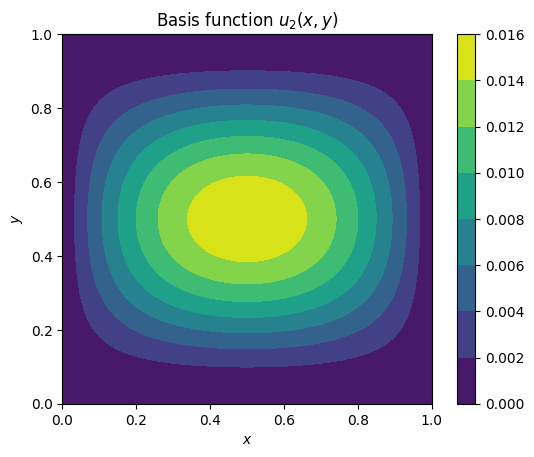

In [101]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
cmap = ax.contourf(X, Y, u2(X, Y))
fig.colorbar(cmap)
ax.set_title("Basis function $u_2(x, y)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

We can assemble and solve the algebraic system. Our set of four algebraic equations evaluated at four collocation points read
\begin{align*}
-c_1 \Delta u_1(P_1) - c_2 \Delta u_2(P_1) - c_3 \Delta u_3(P_1) - c_4 \Delta u_4(P_1) &= 1,\\
-c_1 \Delta u_1(P_2) - c_2 \Delta u_2(P_2) - c_3 \Delta u_3(P_2) - c_4 \Delta u_4(P_2) &= 1,\\
-c_1 \Delta u_1(P_3) - c_2 \Delta u_2(P_3) - c_3 \Delta u_3(P_3) - c_4 \Delta u_4(P_3) &= 1,\\
-c_1 \Delta u_1(P_4) - c_2 \Delta u_2(P_4) - c_3 \Delta u_3(P_4) - c_4 \Delta u_4(P_4) &= 1,
\end{align*}
which can be rewritten into a compact matrix form as $\mathbf A \mathbf c = \mathbf b$ where
\begin{align*}
\mathbf A &= -\begin{bmatrix}
\Delta u_1(P_1) & \Delta u_2(P_1) & \Delta u_3(P_1) & \Delta u_4(P_1) \\
\Delta u_1(P_2) & \Delta u_2(P_2) & \Delta u_3(P_2) & \Delta u_4(P_2) \\
\Delta u_1(P_3) & \Delta u_2(P_3) & \Delta u_3(P_3) & \Delta u_4(P_3) \\
\Delta u_1(P_4) & \Delta u_2(P_4) & \Delta u_3(P_4) & \Delta u_4(P_4)
\end{bmatrix}, \quad
\mathbf c = \begin{bmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \end{bmatrix}, \quad
\mathbf b = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}.
\end{align*}

We use numpy to solve the above linear system and get the solution coefficients $\mathbf c \in \mathbb R^4$.

In [97]:
x1 = np.array([1/4, 1/4])
x2 = np.array([1/2, 1/2])
x3 = np.array([1/2, 3/4])
x4 = np.array([0, 1/2])

colloc_points = np.vstack([x1, x2, x3, x4])
basis_functions = [u1, u2, u3, u4]
ddbasis_functions = [ddu1, ddu2, ddu3, ddu4]

K = np.zeros((4, 4))

for i in range(4):
# Iterate over all colloc. points
    for j in range(4):
        # Iterate over all basis functions
        K[i, j] = -ddbasis_functions[j](colloc_points[i, 0], colloc_points[i, 1])

f = np.array([1, 1, 1, 1])
c = np.linalg.solve(K, f)

def solution(x, y):
    # Combine basis and coefficients into the final solution
    return sum([c[i]*basis_functions[i](x, y) for i in range(4)])

Finally, we can plot the solution function which we obtained as evaluation of coefficients and basis functions,
$$
u_n(x, y) = \sum_{i=1}^4 c_i u_i(x, y).
$$

Text(0, 0.5, '$y$')

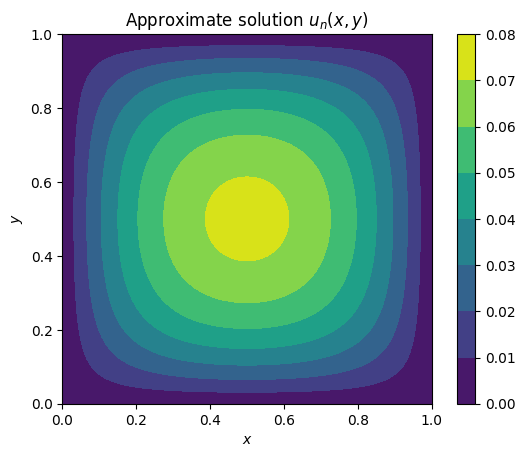

In [98]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
cmap = ax.contourf(X, Y, solution(X, Y))
fig.colorbar(cmap)
ax.set_title("Approximate solution $u_n(x, y)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")